In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data= pd.read_csv("tit.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
def missing_check(data):
    missing_values = data.isnull().sum().sort_values(ascending = False)
    percentage_missing_values = (missing_values/len(data))*100
    print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']))

In [7]:
missing_check(data)

             Missing values  % Missing
Cabin                   687  77.104377
Age                     177  19.865320
Embarked                  2   0.224467
Fare                      0   0.000000
Ticket                    0   0.000000
Parch                     0   0.000000
SibSp                     0   0.000000
Sex                       0   0.000000
Name                      0   0.000000
Pclass                    0   0.000000
Survived                  0   0.000000
PassengerId               0   0.000000


In [8]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data["Embarked"]=data["Embarked"].fillna("S")

In [9]:
data["Family Size"]= data["SibSp"]+data["Parch"]+1
data=data.drop(["Name","Cabin","SibSp","Parch","Ticket"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,1,0,3,male,22.0,7.2500,S,2
1,2,1,1,female,38.0,71.2833,C,2
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,2
4,5,0,3,male,35.0,8.0500,S,1


In [10]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family Size    0
dtype: int64

In [11]:
dummies=pd.get_dummies(data[["Embarked","Sex"]],drop_first=True)
data=pd.concat([data,dummies],axis=1)
data=data.drop(["Sex","Embarked"],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,7.2500,2,0,1,1
1,2,1,1,38.0,71.2833,2,0,0,0
2,3,1,3,26.0,7.9250,1,0,1,0
3,4,1,1,35.0,53.1000,2,0,1,0
4,5,0,3,35.0,8.0500,1,0,1,1


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Family Size,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,1.904602,0.086420,0.725028,0.647587
std,257.353842,0.486592,0.836071,13.019697,49.693429,1.613459,0.281141,0.446751,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,1.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,2.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.model_selection import train_test_split

def data_part(X, y, split_size) :
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = split_size)
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [14]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [15]:
X_train, X_test, y_train, y_test=data_part(X,y,split_size=0.3)

(623, 8)
(268, 8)


In [16]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, test, model, params = None, k = 1) :
    
    if params == None :
        
        ## Fit model 
        model.fit(X, y)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X), model.predict(test))
    
    else :
        
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X,y)
        
        ## check best estimator 
        model = model_cv.best_estimator_
        
        print(model_cv.best_estimator_)
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

In [17]:
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               Accuracy FOR TRAIN DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_train, pred_train))
    
    print('''
            =========================================
               Accuracy FOR TEST DATA
            =========================================''')
    print("Accuracy : ", accuracy_score(y_test, pred_test))

In [18]:
estimator= MLPClassifier(random_state=42,early_stopping=True,solver="adam")
parameters={
'hidden_layer_sizes': [(100,75,50,25,10,),(100,50,25,), (100,50,)],
'alpha': [0.1,0.01,.001],
'activation': ["logistic", "relu", "tanh"]
}

In [19]:
model_cv, model, pred_train, pred_test = model_building(X_train, y_train,X_test, estimator, parameters, 5)
print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
print(model_cv.best_params_, '\n\n')

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 25), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
			 MLPClassifier 

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 25)} 




In [20]:
model_evaluation(y_train, pred_train, y_test, pred_test)


               Accuracy FOR TRAIN DATA
Accuracy :  0.7126805778491172

               Accuracy FOR TEST DATA
Accuracy :  0.7014925373134329


In [21]:
accuracy_tr=[]
accuracy_te=[]
epochs=[5,10,20,30,50,80,100,120,150,180,200,230,250,280,300,330,370,400,420,480,500]
for i in epochs:
    Neural_Net= MLPClassifier(max_iter=i,random_state=42,early_stopping=True,solver="adam",activation='relu', alpha=0.1, hidden_layer_sizes= (100, 50, 25,))
    Neural_Net.fit(X_train,y_train)
    Pred_train= Neural_Net.predict(X_train)
    Training_Acc= accuracy_score(y_train,Pred_train)
    Pred_test= Neural_Net.predict(X_test)
    Testing_Acc= accuracy_score(y_test,Pred_test)
    accuracy_tr.append(Training_Acc)
    accuracy_te.append(Testing_Acc)   

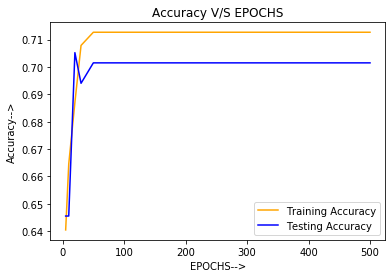

In [22]:
plt.plot(epochs,accuracy_tr,color="orange",label="Training Accuracy")
plt.plot(epochs,accuracy_te,color="blue",label="Testing Accuracy")
plt.title("Accuracy V/S EPOCHS")
plt.xlabel("EPOCHS-->")
plt.ylabel("Accuracy-->")
plt.legend()
plt.show()


In [27]:
NN= MLPClassifier(max_iter=50,random_state=42,early_stopping=True,solver="adam",activation='relu', alpha=0.1, hidden_layer_sizes= (100, 50, 25,))
NN.fit(X_train,y_train)
nn_tr_pred= NN.predict(X_train)
nn_te_pred= NN.predict(X_test)
training_acc_nn= accuracy_score(y_train,nn_tr_pred)
testing_acc_nn= accuracy_score(y_test,nn_te_pred)

In [28]:
print("Training Accuracy : Neural Network =",(training_acc_nn)*100,"%")
print("Test Accuracy : Neural Network =",(testing_acc_nn)*100,"%")

Training Accuracy : Neural Network = 71.26805778491172 %
Test Accuracy : Neural Network = 70.1492537313433 %


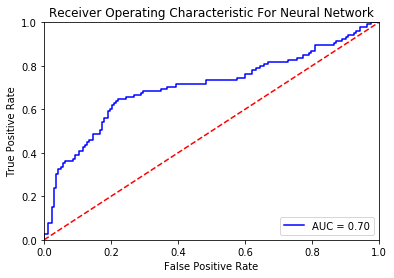

In [29]:
probs_NN = NN.predict_proba(X_test)
preds_NN = probs_NN[:,1]
fpr_NN, tpr_NN, threshold_NN = metrics.roc_curve(y_test, preds_NN)
roc_auc_NN = metrics.auc(fpr_NN, tpr_NN)


plt.title('Receiver Operating Characteristic For Neural Network')
plt.plot(fpr_NN, tpr_NN, 'b', label = 'AUC = %0.2f' % roc_auc_NN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
confusion_matrix(y_test,nn_te_pred,labels=[0,1])

array([[135,  28],
       [ 52,  53]], dtype=int64)

In [36]:
accuracy_CV=[]
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_CV.append(scores.mean()) 

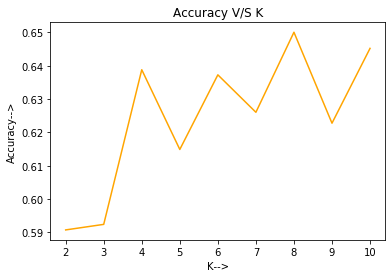

In [38]:
plt.plot(list(range(2,11)),accuracy_CV,color="orange",label="Accuracy")
plt.title("Accuracy V/S K")
plt.xlabel("K-->")
plt.ylabel("Accuracy-->")
plt.show()


In [39]:
KNN=KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train,y_train)
knn_tr_pred= KNN.predict(X_train)
knn_te_pred= KNN.predict(X_test)
training_acc_knn= accuracy_score(y_train,knn_tr_pred)
testing_acc_knn= accuracy_score(y_test,knn_te_pred)

In [40]:
print("Training Accuracy : KNN =",(training_acc_knn)*100,"%")
print("Test Accuracy : KNN =",(testing_acc_knn)*100,"%")

Training Accuracy : KNN = 69.02086677367576 %
Test Accuracy : KNN = 64.17910447761194 %


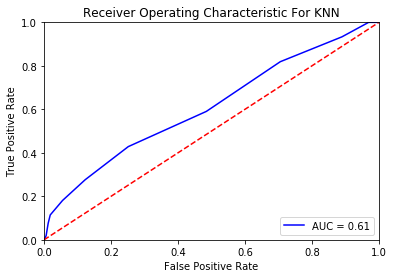

In [41]:
probs_KNN = KNN.predict_proba(X_test)
preds_KNN = probs_KNN[:,1]
fpr_KNN, tpr_KNN, threshold_KNN = metrics.roc_curve(y_test, preds_KNN)
roc_auc_KNN = metrics.auc(fpr_KNN, tpr_KNN)


plt.title('Receiver Operating Characteristic For KNN')
plt.plot(fpr_KNN, tpr_KNN, 'b', label = 'AUC = %0.2f' % roc_auc_KNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
confusion_matrix(y_test,knn_te_pred,labels=[0,1])

array([[143,  20],
       [ 76,  29]], dtype=int64)